In [21]:
import networkx as nx
import random 
import math
import matplotlib.pyplot as plt

n=20
graph=nx.complete_graph(n)

coordinates= {i : (random.random(),random.random()) for i in graph.nodes}

#nx.draw(graph,pos=coordinates)

(array([9., 5., 1., 2., 0., 0., 1., 1., 0., 1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

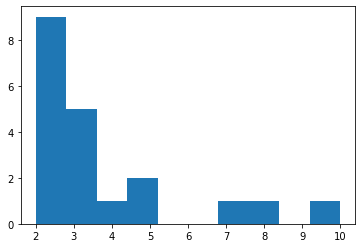

In [17]:
## to see how many neighbours each node has

plt.hist([v for k,v in nx.degree(graph)])

## create a graph based on input as a pd dataframe
G=nx.from_pandas_edgelist(df,source='colname',target='colname2')

In [53]:
def eu_dist(x1,y1,x2,y2):
    return math.sqrt((x2-x1)**2 + (y1-y2)**2)

for i,j in graph.edges:
    (x1,y1)=coordinates[i]
    (x2,y2)=coordinates[j]
    graph.edges[i,j]['length']=eu_dist(x1,y1,x2,y2)

# Nearest Neighbour Heuristics

In [48]:
## Nearest neighbour heuristics

def nn_heuristic(graph):
    #start with any random node
    tour=[0]

    #find the nearest neighbour to the above node
    while len(tour)< graph.number_of_nodes():
        i=tour[-1]
        min_length=min(graph.edges[i,j]['length'] for j in graph.neighbors(i) if j not in tour)
        nearest_neighbours=[j for j in graph.neighbors(i) if j not in tour and graph.edges[i,j]['length']==min_length] 
        j=nearest_neighbours[0]

        tour.append(j)
        
    return tour

tour=nn_heuristic(graph)
print(tour)

tour_edges=[(tour[i-1],tour[i]) for i in range(graph.number_of_nodes())]
print(tour_edges)


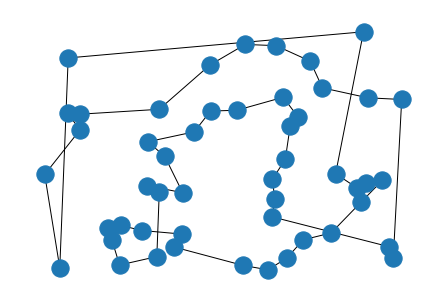

In [41]:
nx.draw(graph.edge_subgraph(tour_edges),pos=coordinates)

# 2-opt Heuristics 

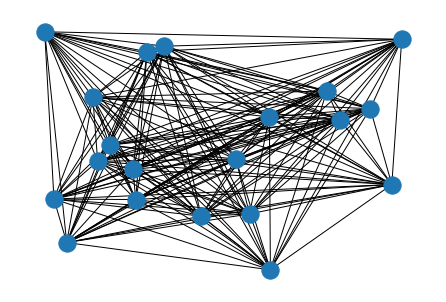

In [37]:
## 2-opt heuristics

n=20
graph2=nx.complete_graph(n)

coordinates= {i : (random.random(),random.random()) for i in graph.nodes}

nx.draw(graph2,pos=coordinates)


In [38]:
def eu_dist(x1,y1,x2,y2):
    return math.sqrt((x2-x1)**2 + (y1-y2)**2)

for i,j in graph2.edges:
    (x1,y1)=coordinates[i]
    (x2,y2)=coordinates[j]
    graph2.edges[i,j]['length']=eu_dist(x1,y1,x2,y2)

In [39]:
## 2-opt heuristics

# pick an arbitary route e.g. (0,1,2,....n-1)

tour=list(graph2.nodes)
tour_edges=[(tour[i-1],tour[i]) for i in tour]
print(tour)
print(tour_edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[(19, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)]


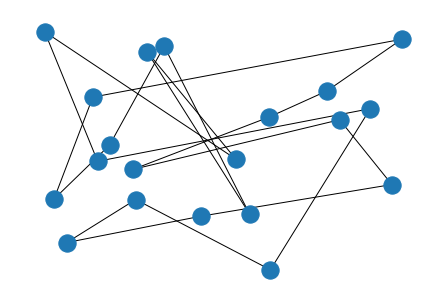

In [40]:
nx.draw(graph2.edge_subgraph(tour_edges),pos=coordinates)

swap edges (0, 1) (4, 5) with (0, 4) (1, 5)
swap edges (0, 4) (9, 10) with (0, 9) (4, 10)
swap edges (9, 8) (4, 10) with (9, 4) (8, 10)
swap edges (9, 4) (15, 16) with (9, 15) (4, 16)
swap edges (9, 15) (16, 17) with (9, 16) (15, 17)
swap edges (4, 3) (1, 5) with (4, 1) (3, 5)
swap edges (4, 1) (11, 12) with (4, 11) (1, 12)
swap edges (4, 11) (12, 13) with (4, 12) (11, 13)
swap edges (4, 12) (13, 14) with (4, 13) (12, 14)
swap edges (4, 13) (14, 15) with (4, 14) (13, 15)
swap edges (4, 14) (15, 17) with (4, 15) (14, 17)
swap edges (15, 13) (8, 7) with (15, 8) (13, 7)
swap edges (10, 11) (13, 7) with (10, 13) (11, 7)
swap edges (11, 7) (5, 3) with (11, 5) (7, 3)
swap edges (11, 5) (14, 17) with (11, 14) (5, 17)
swap edges (11, 14) (17, 18) with (11, 17) (14, 18)
swap edges (17, 5) (7, 3) with (17, 7) (5, 3)
swap edges (2, 1) (12, 14) with (2, 12) (1, 14)
swap edges (2, 12) (14, 18) with (2, 14) (12, 18)
swap edges (2, 14) (18, 19) with (2, 18) (14, 19)
swap edges (12, 1) (14, 19) with (

/var/folders/my/1126m1255k36stt7f2r98h_w0000gq/T/ipykernel_61351/584367214.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure() # call this to create a new figure, instead of drawing over the previous one(s)


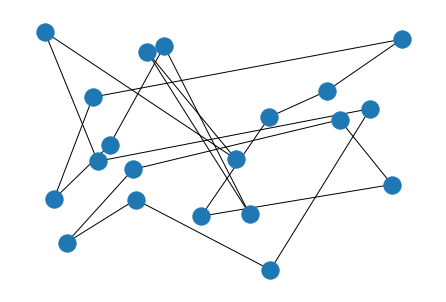

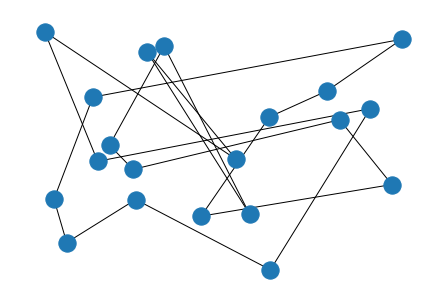

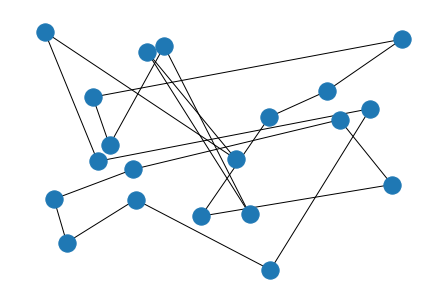

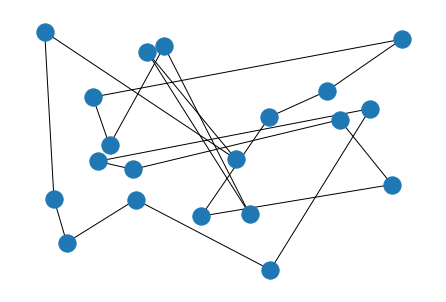

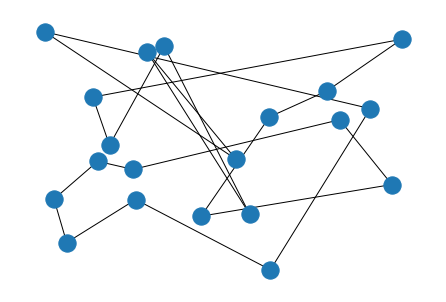

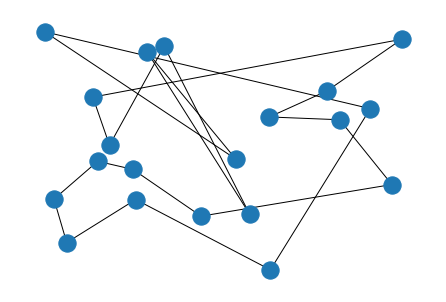

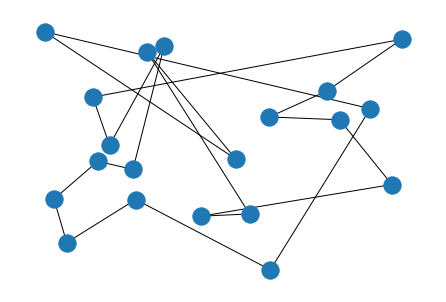

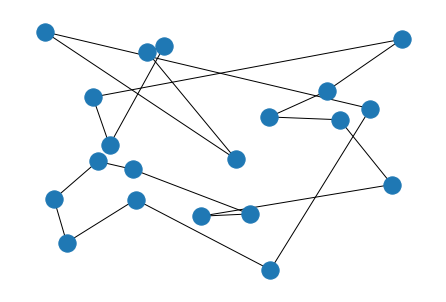

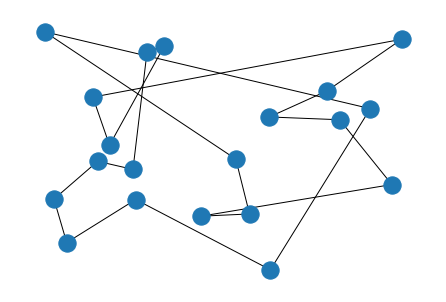

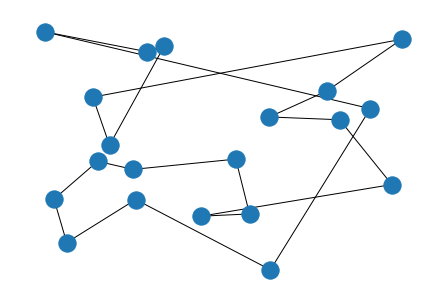

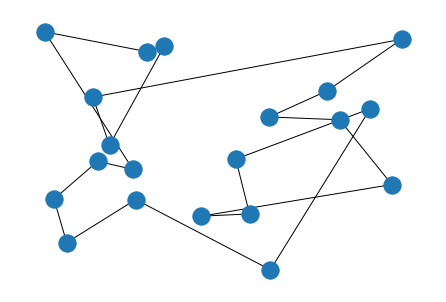

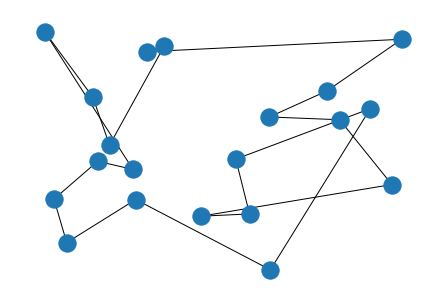

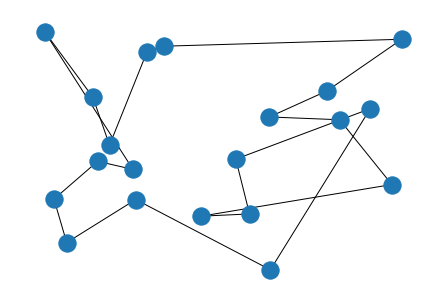

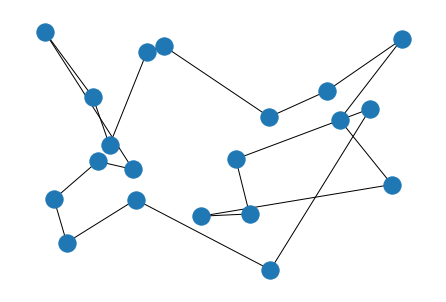

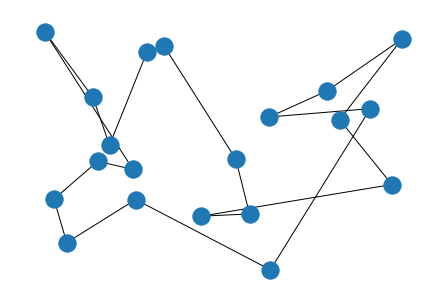

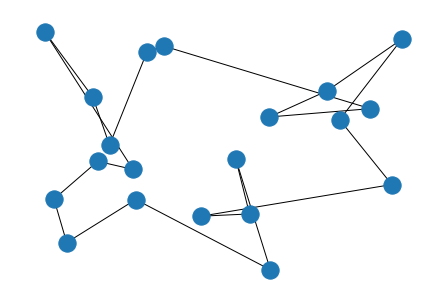

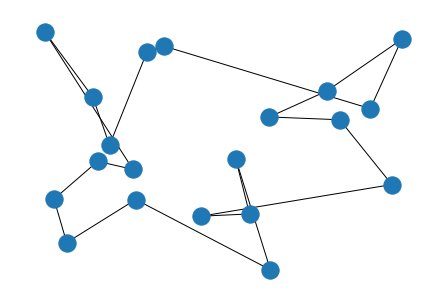

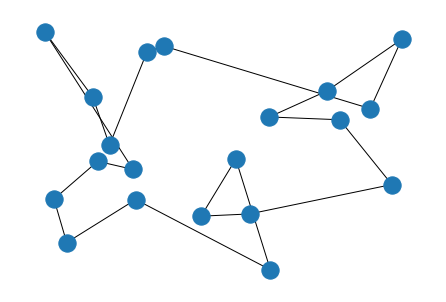

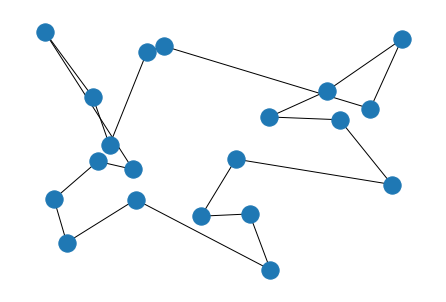

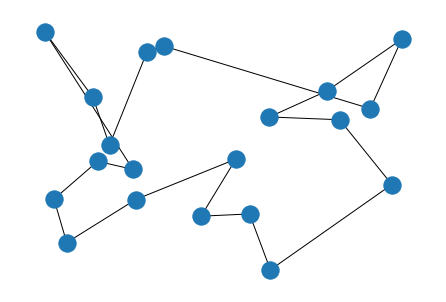

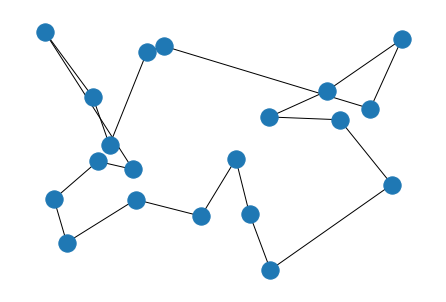

In [41]:
## 2-opt heuristics

# pick an arbitary route e.g. (0,1,2,....n-1)
# exchange two edges from above route
# 1-2-3  -4-5-6  -7-8-9  ##initial
# 1-2-3-6-5-4-7-8-9 ## new 

improved = True

#while improved:
    
    #improved=False
    
for i in range(n):
    for j in range(i+1,n):
        
        cur1= (tour[i],tour[i+1])
        cur2= (tour[j],tour[(j+1)%n])
        cur_length=graph2.edges[cur1]['length'] + graph2.edges[cur2]['length']

                # two new edges
        new1= (tour[i],tour[j])
        new2= (tour[i+1],tour[(j+1)%n])
        new_length=graph2.edges[new1]['length'] + graph2.edges[new2]['length']

        if new_length<cur_length :
            print("swap edges",cur1,cur2,"with",new1,new2)

            tour[i+1:j+1]=tour[i+1:j+1][::-1]
                    #improved=True
            tour_edges=[(tour[i-1],tour[i]) for i in range(n)]

            plt.figure() # call this to create a new figure, instead of drawing over the previous one(s)
            nx.draw(graph2.edge_subgraph(tour_edges),pos=coordinates)
        
        

In [15]:
print(tour)
## (3,4) (6,7)
## (3,6) (4,7)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [14]:
tour[4:7][::-1]

[6, 5, 4]

In [19]:
tour[4:7]=tour[4:7][::-1]

In [20]:
print(tour)

[0, 1, 2, 3, 6, 5, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


# 2-Approx algorithm 

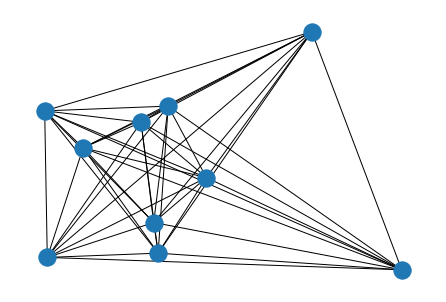

In [47]:
n=10
graph=nx.complete_graph(n)

coordinates= {i : (random.random(),random.random()) for i in graph.nodes}

for i,j in graph.edges:
    (x1,y1)=coordinates[i]
    (x2,y2)=coordinates[j]
    graph.edges[i,j]['length']=math.sqrt((x2-x1)**2 + (y1-y2)**2)
    
nx.draw(graph,pos=coordinates)


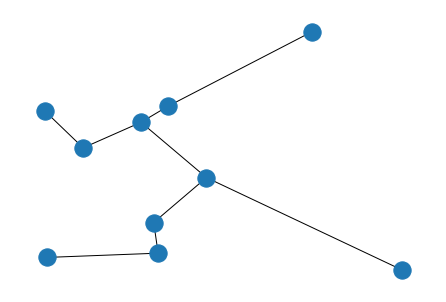

In [48]:
# create a min-spanning tree- its min. edge-weight graph with all nodes connected and no cycle formed.

T = nx.minimum_spanning_tree(graph,weight='length')
nx.draw(T, pos=coordinates)

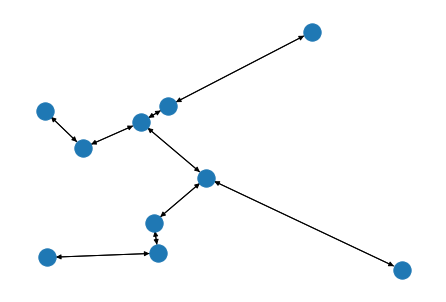

In [53]:
# Double the min-spanning tree

D = nx.DiGraph(T)
nx.draw(D,pos=coordinates)

In [56]:
# find an Eulerian cycle of the doubled spanning tree -- length of Eulerian cycle is twice the length of spanning tree

initial_tour = list( nx.eulerian_circuit(D,source=0) )
print(initial_tour)


[(0, 8), (8, 9), (9, 6), (6, 9), (9, 8), (8, 7), (7, 3), (3, 7), (7, 1), (1, 5), (5, 2), (2, 5), (5, 1), (1, 7), (7, 8), (8, 0), (0, 4), (4, 0)]


In [57]:
# take shortcuts (avoid repeated nodes)
tour = [ 0 ]
for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
print(tour)

[0, 8, 9, 6, 7, 3, 1, 5, 2, 4]


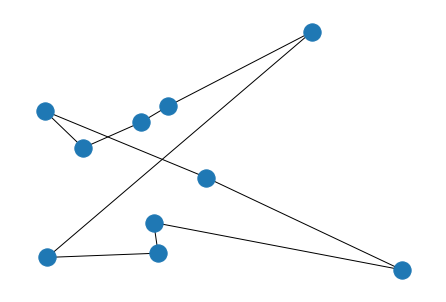

In [60]:
# draw the tour
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
nx.draw(graph.edge_subgraph(tour_edges), pos=coordinates)

### Although this is not optimal tour but we atleast know that 
### length of this tour is at most twice the length of optimal tour

# Christofides Algorithm

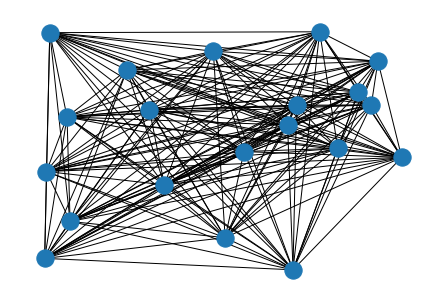

In [62]:
import networkx as nx

n = 20                     # number of cities
G = nx.complete_graph(20)  # graph with a vertex for each city
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)


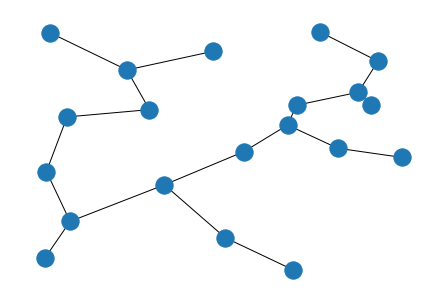

In [63]:
# find minimum spanning tree
T = nx.minimum_spanning_tree(G,weight='length')
nx.draw(T, pos=my_pos)

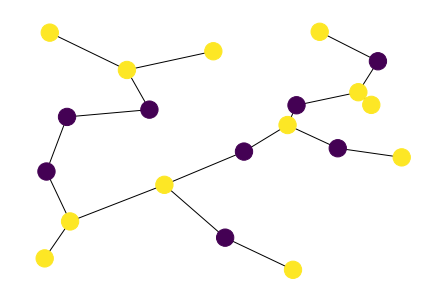

In [64]:

# identify the odd-degree nodes -- %2 will give either 0 or 1, 0 if number is even and 1 if its odd
odd_degree_nodes = [ i for i in T.nodes if T.degree(i) % 2 ]
## color the odd-degree nodes in diferent colors
node_colors = [ T.degree(i) % 2 for i in T.nodes ]
nx.draw(T, pos=my_pos, node_color=node_colors)

{(15, 17), (0, 3), (8, 16), (10, 13), (1, 4), (7, 19)}


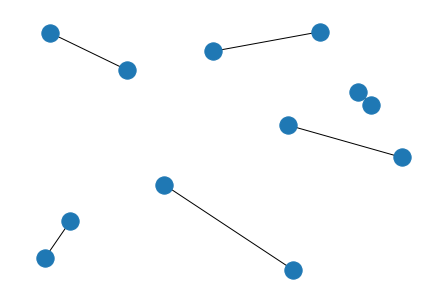

In [66]:
# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['length']
    
matching = nx.max_weight_matching( G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
print(matching)


# draw the matching
nx.draw(G.edge_subgraph(matching),pos=my_pos)

In [67]:
# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

print(M.edges())
print("M has this many edges =",M.number_of_edges())

[(0, 3), (0, 3), (1, 14), (1, 4), (2, 15), (2, 9), (3, 6), (3, 18), (4, 18), (4, 5), (4, 14), (5, 8), (6, 13), (7, 11), (7, 10), (7, 19), (7, 19), (8, 12), (8, 15), (8, 16), (9, 11), (10, 13), (12, 16), (15, 17), (15, 17)]
M has this many edges = 25


In [68]:
# find an Eulerian cycle of the multigraph
initial_tour = list ( nx.eulerian_circuit(M,source=0) )
print(initial_tour)

[(0, 3), (3, 18), (18, 4), (4, 14), (14, 1), (1, 4), (4, 5), (5, 8), (8, 16), (16, 12), (12, 8), (8, 15), (15, 17), (17, 15), (15, 2), (2, 9), (9, 11), (11, 7), (7, 19), (19, 7), (7, 10), (10, 13), (13, 6), (6, 3), (3, 0)]


In [69]:
# take shortcuts (avoid repeated nodes)
tour = [ 0 ]
for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
print(tour)

[0, 3, 18, 4, 14, 1, 5, 8, 16, 12, 15, 17, 2, 9, 11, 7, 19, 10, 13, 6]


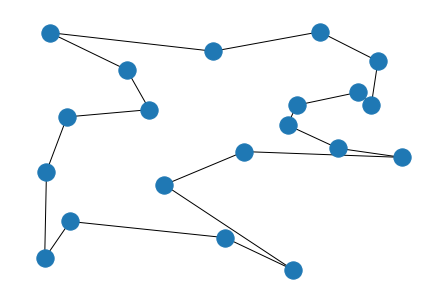

In [70]:
# draw the tour
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)

# MTZ model

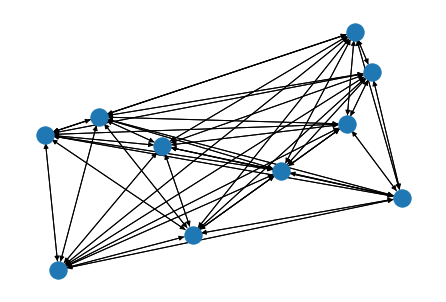

In [72]:
import networkx as nx

n = 10                                   # number of cities
G = nx.complete_graph(n, nx.DiGraph())  # *directed* graph with a vertex for each city
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

In [73]:
import gurobipy as gp
from gurobipy import GRB

